<a href="https://colab.research.google.com/github/Anubhab17/M-D5030E---Bayesian-Data-Analysis-and-Probabilistic-Programming---24-25--colab_notebooks/blob/main/gridding2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement the posterior of the height model, by using a 2-d gridding.


\begin{align*}
\mu & \sim N(175,5)\\
\sigma & \sim half-normal(35)\\
y & \sim 𝑁(𝜇, 𝜎)\\
\end{align*}

Assume that two measures are available: 168 and 178 cm.

In [1]:
#various imports
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import halfnorm
import matplotlib.pyplot as plt

# Create the bi-dimensional grid

In [2]:
#we consider a grid of +- 6 prior sigma, hence +-30.
#to keep the computation fast, we use only 80 points.
mu_len = 80
mu = np.linspace(145, 205, mu_len)
mu_step = mu[1]-mu[0]

#the sigma has a broad range (see slides: 75% pctile is 40; max is 128 and we use more points)
#the value of 0 is not feasible.
#we would better have a non-uniform grid
sigma = np.linspace(0.01, 100, 120)
sigma_step = sigma[1]-sigma[0]
post_density = np.zeros( ( len(mu),len(sigma) ) )

# Compute the unnormalized posterior

In [3]:
#we could vectorize the code. But here we aim at clarity.
# we assume the priors p(mu) and p(sigma) to be independent
for row, current_mu in enumerate(mu):
  mu_prior = norm.pdf(current_mu, loc=175, scale=5)
  for col, current_sigma in enumerate(sigma):
    sigma_prior = halfnorm.pdf(current_sigma, scale=35)
    prior   = mu_prior * sigma_prior

    #assuming independence of the y_i, the lik terms multiply
    lik   = norm.pdf(168, loc=current_mu, scale=current_sigma)
    lik   = lik * norm.pdf(178, loc=current_mu, scale=current_sigma)

    #unnormalized density
    post_density[row,col] = prior * lik

# Normalize the posterior

* In this toy example we work with the posterior.
* In more complicated examples, it is necessary using the *log*-posterior.

In [4]:
#normalizing constant
Z = np.sum(post_density * sigma_step * mu_step)

#the post_density, integrated over sigma and mu sum up to 1.
post_density = post_density/Z

# Plot the joint

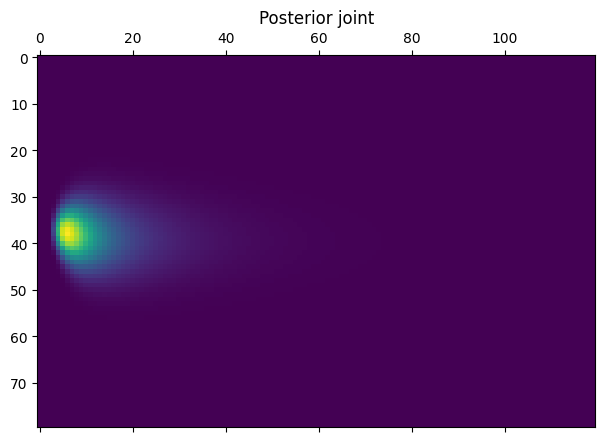

In [5]:
plt.matshow(post_density)
plt.title("Posterior joint")
plt.show()

# Plot the posterior marginal of $\mu$ and $\sigma$

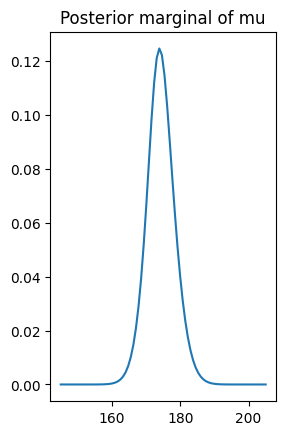

In [6]:
#posterior marginal of mu
plt.subplot(1, 2, 1)
post_mu = np.nansum(post_density, axis=1)
plt.plot(mu,post_mu)
plt.title("Posterior marginal of mu")
plt.show()

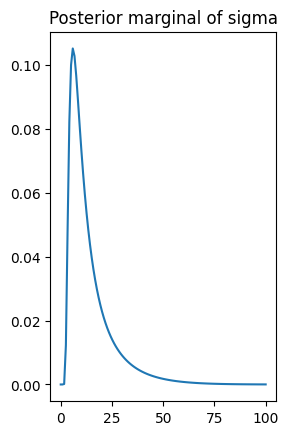

In [7]:
#posterior marginal of sigma
post_sigma = np.sum(post_density, axis=0)
plt.subplot(1, 2, 2)
plt.plot(sigma,post_sigma)
plt.title("Posterior marginal of sigma")
plt.show()